# Lab 5 A - Andre Piccolo - 300347025

## Import Library

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Read Data

In [257]:
df = pd.read_csv('employee.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


## Create dummy features

In [258]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

In [259]:
print(df.isnull().sum())

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales         

## Elbow method

In [260]:
# Methods to support elbow method
def compute_points_elbow(df):
    data_points = []
    for n in range(1, 10):
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(X=df)
        data_points.append(kmeans.inertia_)
    return data_points

def plot_points_elbow(data_points):
    plt.plot(range(1,10),data_points,'-bo')
    plt.xlabel('Number of cluster')
    plt.ylabel('Sum of square distances')
    plt.title('Elbow method')
    plt.show()

def find_elbow(data_points):
    knee = KneeLocator(range(1,10), data_points, curve='convex', direction='decreasing')
    return knee.elbow

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


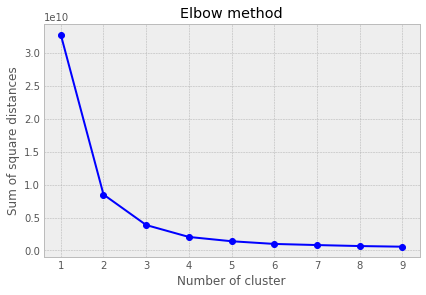

The elbow is:  3


In [261]:
data = compute_points_elbow(df)
plot_points_elbow(data)
number_cluster = find_elbow(data)
print("The elbow is: ", number_cluster)

## Support methods for Pipeline

In [262]:
clusters=[]
name=[]
sh_score=[]
ch_score=[]
db_score=[]

def loadModelInfo(cluster):
    clusters.append(cluster)
    name.append(cluster.__class__.__name__)

## Clustering algorithms

### AgglomerativeClustering

In [263]:
loadModelInfo(AgglomerativeClustering(n_clusters=number_cluster))

### KMeans

In [264]:
loadModelInfo(KMeans(n_clusters=number_cluster, init="k-means++", max_iter=500,random_state=42))

### Birch

In [265]:
loadModelInfo(Birch(n_clusters=number_cluster))

### SpectralClustering

In [266]:
loadModelInfo(SpectralClustering(n_clusters=number_cluster))

## Pipeline with Robust scaler, pca, and clusters

In [267]:
for cluster in clusters:
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('preprocessor', PCA(n_components=2, random_state=42)),
                     ('cluster', cluster)])
    y_pred = pipe.fit_predict(df)
    sh_score.append(silhouette_score(df, y_pred, metric='euclidean'))
    ch_score.append(calinski_harabasz_score(df, y_pred))
    db_score.append(davies_bouldin_score(df, y_pred))

## Create a dataframe to combine the result

In [268]:
df_result = pd.DataFrame(zip(name, sh_score, ch_score, db_score), 
                      columns=["clustering", "silhoutte", "callinsky", "davies"])
df_result

,clustering,silhoutte,callinsky,davies
0,AgglomerativeClustering,0.144510,1119.387585,2.119416
1,KMeans,0.155157,1005.758841,1.647734
2,Birch,-0.003470,643.809135,9.484677
3,SpectralClustering,0.080587,708.650050,3.315900


Using the parameters in this way: Silhouette score: higher is better / Calinski Harabaz: higher is better / Davies Bouldin: lower is better. The best model is:
* KMeans model

## Plot the clusters

In [269]:
def plot_cluster(df):    
    plt.style.use("bmh")
    plt.figure(figsize=(8, 8))

    scat = sns.scatterplot(        
        data=df, 
        x="component 1",
        y="component 2",
        hue="predicted_cluster",
        palette="Set2"
    )

    scat.set_title(
        "Clustering obtained using PCA"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.show()

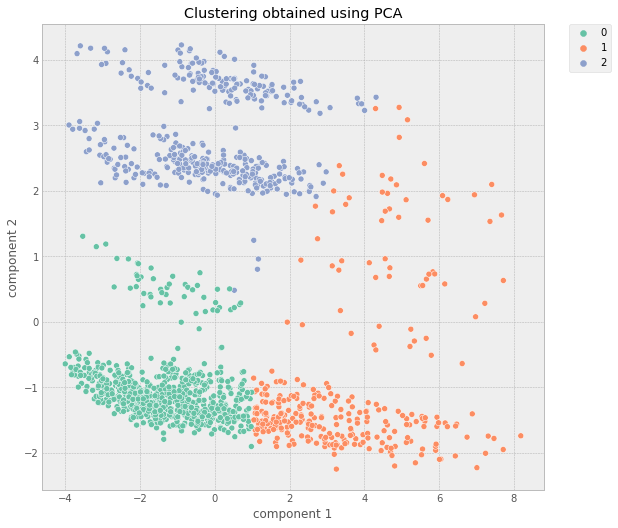

In [270]:
plot_result = pd.DataFrame(
    Pipeline([('scaler', StandardScaler()),('preprocessor', PCA(n_components=2, random_state=42))]).fit_transform(df),
    columns=["component 1", "component 2"])

plot_result["predicted_cluster"] = clusters[1].labels_
plot_cluster(plot_result)